#### 1. Regression 실습 데이터 - Kaggle Car Price Prediction Multiple Linear Regression: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

우선 데이터를 읽어오겠습니다.

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = os.sep.join(data_path + ['CarPrice_Assignment.csv'])
data = pd.read_csv(filepath)

data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [240]:
from __future__ import print_function
import os
data_path = []

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

#### 2. 본 데이터에 대해서 발굴,분석,예측하고자 하는 목적을 작성해 봅니다.
이 데이터 분석의 목표는 차의 fueltype, carheight, 등의 정보가 주어졌을 때 regression을 통해 해당 차량의 가격을 최대한 정확하게 예측하는 것입니다. 
최소화 하고자 하는 목적함수는 RMSE입니다. 

x_i 는i번째 test_data, y_i 는 i 번쨰 data의 실제 가격, f(x)의 가격 예측 함수 라고 할때 

$$ 
Objective : \sqrt{\frac{1}{N} \sum_{i=1}^{N} (f(x_i) - \hat{y}_i)^2} $$

해당 값을 최소화 하는 f를 찾는 것이 목적입니다.

#### 3. 실습 영상(W13-02, W13-05)에 기초하여, Linear Regression, Lasso Regression 알고리즘의 성공적인 수행을 위한 필요 단계(기술, 절차)를 적용하여 Evidence-based Reasoning을 제시합니다.

#### 4. Data Pre-processing, One-hot encoding, Scaling, CV, SGD 적용에 따른 시간 이득 vs. 오류률 등을 포함하여 다양한 측면에서 입체적으로 분석합니다.

여러 방면에서 분석해보겠습니다.

우선 one-hot encoding에 관한 내용입니다.
one-hot encoding 이외에 string data를 완전히 삭제하는 방법도 있습니다. 두가지 방법의 정확도를 비교해보겠습니다.

In [241]:
before_encoding_size = len(data.columns)
one_hot_encode_cols = data.dtypes[data.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of cat

for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

# Do the one hot encoding
one_hot_data = pd.get_dummies(data, columns=one_hot_encode_cols)

print("column의 개수 encoding 전: " ,before_encoding_size , "encoding 후:" , len(one_hot_data.columns) )

one_hot_data


column의 개수 encoding 전:  26 encoding 후: 201


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


one-hot encoding을 적용했을 때의 데이터입니다. 26개의 column에서 201개로 많이 늘어났습니다.
column이 많이 늘어났으므로 계산 시간이 길어질것으로 생각됩니다.

In [242]:
df = pd.DataFrame(data)
string_columns = df.select_dtypes(include='category').columns
df_dropped = df.drop(columns=string_columns)
df_dropped

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


10개의 행이 삭제되고 16개의 column만 남겨졌습니다. 
의미를 가진 데이터 column이 삭제되었으므로 오류가 더 많을 것으로 생각됩니다. 
둘을 비교해보겠습니다.

In [243]:
train, test = train_test_split(one_hot_data, test_size=0.3, random_state=1)
pd.options.mode.chained_assignment = None
    
feature_cols = [x for x in train.columns if x != 'price']

X_train = train[feature_cols].to_numpy()
y_train = train['price'].to_numpy()

X_test  = test[feature_cols].to_numpy()
y_test  = test['price'].to_numpy()

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print("one-hot encoding 적용시 RMSE : ", linearRegression_rmse)
coefficients = pd.Series(linearRegression.coef_, index=feature_cols)

print(coefficients)

one-hot encoding 적용시 RMSE :  14463.256841159893
car_ID               149.714681
symboling           1811.177201
wheelbase           -496.764871
carlength           -385.767466
carwidth            3451.662881
                       ...     
fuelsystem_idi     11993.507185
fuelsystem_mfi         0.000000
fuelsystem_mpfi    -3901.817849
fuelsystem_spdi    -9659.787705
fuelsystem_spfi     5069.107528
Length: 200, dtype: float64


In [244]:
train, test = train_test_split(df_dropped, test_size=0.3, random_state=1)
pd.options.mode.chained_assignment = None
    
feature_cols = [x for x in train.columns if x != 'price']

X_train = train[feature_cols].to_numpy()
y_train = train['price'].to_numpy()

X_test  = test[feature_cols].to_numpy()
y_test  = test['price'].to_numpy()

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print("string column 드롭 시 RMSE : ", linearRegression_rmse)


string column 드롭 시 RMSE :  3246.4095271788565


예상과 달리 string column들을 drop 했을 때 더 좋은 결과를 나타냈습니다. 이는 drop한 data가 price와 관련이 별로 없어서 그런 것으로 생각됩니다. carname이 가장 많은 column을 차지하는데 실제로 차의 브랜드가 가격을 결정할 수 있겠지만 one-hot encoding시 audi 100 ls, audi 4000 모두 전혀 관련 없게 encoding되기 때문에 오히려 제거되었을 때 정확도가 높아질 수 있을 것 같습니다.

Lasso, Linear Regression을 비교해보겠습니다.

In [245]:
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005, 0.1, 0.01])

import time
start_time = time.time()  # 시작 시간 기록

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e6,
                  cv=10).fit(X_train, y_train)
end_time = time.time()  # 끝 시간 기록

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower
print(end_time - start_time)

0.1 3246.329306223706
0.01800394058227539


In [246]:
train, test = train_test_split(one_hot_data, test_size=0.3, random_state=1)
pd.options.mode.chained_assignment = None
    
feature_cols = [x for x in train.columns if x != 'price']

X_train = train[feature_cols].to_numpy()
y_train = train['price'].to_numpy()

X_test  = test[feature_cols].to_numpy()
y_test  = test['price'].to_numpy()

start_time = time.time()  # 시작 시간 기록

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e6,
                  cv=10).fit(X_train, y_train)
end_time = time.time()  # 끝

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
print(lassoCV.alpha_, lassoCV_rmse)
print(end_time - start_time)

0.1 4691.662594308858
16.234962701797485


drop 해버린 데이터의 경우 Lasso를 iteration을 많이 높여서 진행했음에도 column수가 적어서 시간이 매우 적게 걸렸다.
one-hot encoding 할시 시간이 16초로 확연히 차이 나는 모습을 확인할 수 있었다.
rmse도 마찬가지로 drop한 데이터가 더 낮았다.

one-hot encoding한 데이터에서 CV를 조절 했을떄를 분석하겠다.

C:\Users\moons\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 831603.9812406213, tolerance: 474058.68513186084
  model = cd_fast.enet_coordinate_descent(
C:\Users\moons\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1755051.565382233, tolerance: 923825.4868066212
  model = cd_fast.enet_coordinate_descent(
C:\Users\moons\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1952899.4199695126, tolerance: 790254.8069976437
  model = cd_fast.enet_coordinate_descent(
C:\Users\moons\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

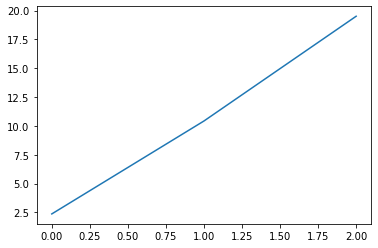

In [247]:
elapsed_time_list = []
rmse_list = []

start_time = time.time()  # 시작 시간 기록

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=2).fit(X_train, y_train)
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

end_time = time.time()  # 끝

elapsed_time_list.append(end_time - start_time)
rmse_list.append(lassoCV_rmse)


start_time = time.time()  # 시작 시간 기록

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=10).fit(X_train, y_train)
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

end_time = time.time()  # 끝

elapsed_time_list.append(end_time - start_time)
rmse_list.append(lassoCV_rmse)


start_time = time.time()  # 시작 시간 기록

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=20).fit(X_train, y_train)
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

end_time = time.time()  # 끝

elapsed_time_list.append(end_time - start_time)
rmse_list.append(lassoCV_rmse)


import matplotlib.pyplot as plt

plt.plot(elapsed_time_list)

[4691.675217682857, 4691.675217682857, 4691.675217682857]

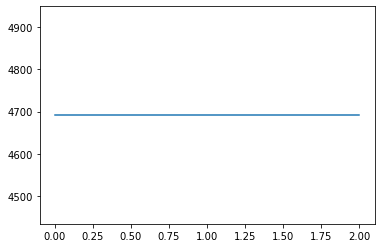

In [248]:
plt.plot(rmse_list)
rmse_list

CV를 늘렸을 때 여러번 학습 시키게 되므로 시간은 늘어난 모습을 보였으나 rmse의 경우 변화가 없는 모습을 보였다. 
4691.675217682857 이 최적의 값이고 이미 최적의 값을 찾았기 때문으로 보인다. 

one-hot encoding을 한 data로 예시에 나와있는 skewed한 column log 취하기, standardize등을 해봤으나 string column을 drop한 data 를 regression 했을 때 이상의 결과를 얻을 수 없었습니다.

RMSE :  3246.4095271788565



[Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price'),
 (0.0, 41315.0),
 (0.0, 41315.0)]

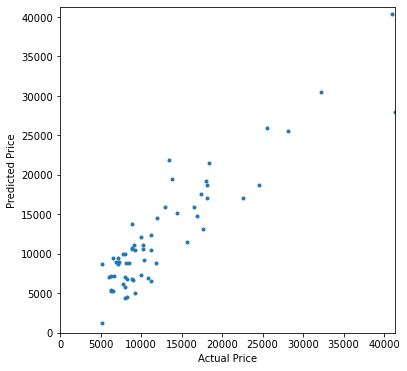

In [253]:
import matplotlib.pyplot as plt

train, test = train_test_split(df_dropped, test_size=0.3, random_state=1)
pd.options.mode.chained_assignment = None
    
feature_cols = [x for x in train.columns if x != 'price']

X_train = train[feature_cols].to_numpy()
y_train = train['price'].to_numpy()

X_test  = test[feature_cols].to_numpy()
y_test  = test['price'].to_numpy()

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))


f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,)


실제로 꽤 predicted price / actual price가 x = y 함수에 근접한 prediction을 보이는 것을 확인했습니다